# Всяко бывает, да не со всеми  
**или**
## Краткое введение в некоторые проблемы статистики

Сегодня мы поговорим о том, почему одно измерение не показывает нам всё картины (и почему Азимов был неправ, утверждая, что президента может выбирать один выборщик, а судить по последнему деянию, как в сериале "Небесный суд" нельзя), как можно просто понять, что два распределения различны, и то, что уже хватит проводить эксперименты.

В промежутках нам будут попадаться фрагменты кода, который генерирует графики и позволяет поиграть со статистическими распределениями. 

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Посмотрим как распределение генерируется из отдельных точек.

Создадим генератор случайных числе с равномерным законом распределения и сгенерируем тысячу точек. Нарисуем каждую отдельную точку в том месте, где она была сгенерирована, но если точки начинают накладывваться, сдвинем новую точку немного вверх или вниз, пока она не перестанет накладываться на другие. Посмотрим какое распределение получится.

In [2]:
u1 = stats.uniform(loc=1, scale=1)

In [3]:
r = u1.rvs(size=1000)

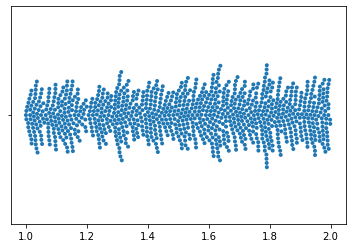

In [4]:
ax = sns.swarmplot(x=r, size=4)

![](https://imgs.xkcd.com/comics/t_distribution_2x.png)

Теперь сделаем тоже самое для нормального распределения.

In [5]:
n1 = stats.norm(loc=1, scale=1)

In [6]:
r = n1.rvs(size=1000)

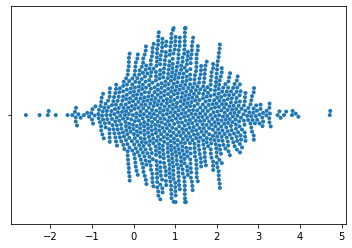

In [7]:
ax = sns.swarmplot(x=r, size=4)

Оно снова выглядит не так ровно, как должно было бы выглядеть идеальное распределение. Потому что никто не идеален.  
Чтобы сгладить картину, построим гистограмму распределения точек по разному количеству интервалов. Как видно из рисунка, чем больше дискретизация, тем больше отклонений. Потому что при малом количестве интервалов в них собираетсяя больше точек, которые улучшают статистику.

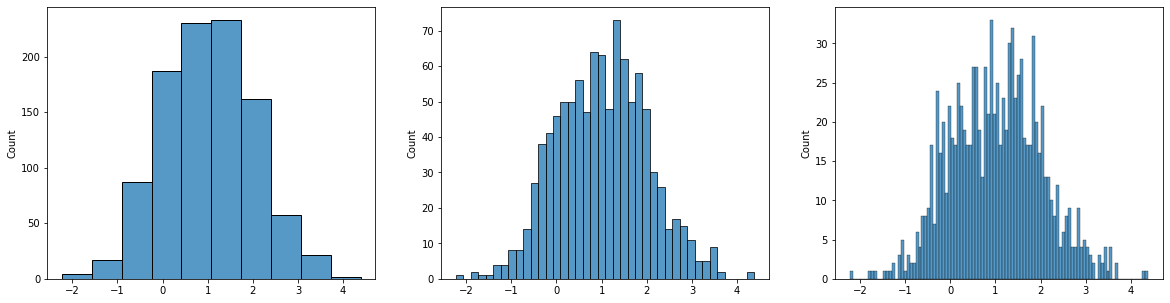

In [11]:
#sns.distplot(r)


fig, axes = plt.subplots(1, 3, figsize=(20,5))
r1 = n1.rvs(size=1000)
sns.histplot(r1, bins=10, ax=axes[0]);
sns.histplot(r1, bins=40, ax=axes[1]);
sns.histplot(r1, bins=100, ax=axes[2]);


Посмотрим как совмещаются распределение и точки.

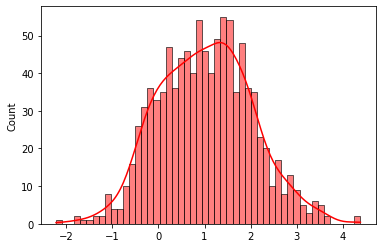

In [24]:
ax = sns.histplot(r1, color="r", bins=50, kde=True)

Попробуем взять несколько групп случайно сгенерированных точек и посмотреть невооруженным глазом насколько они отличаются друг от друга.

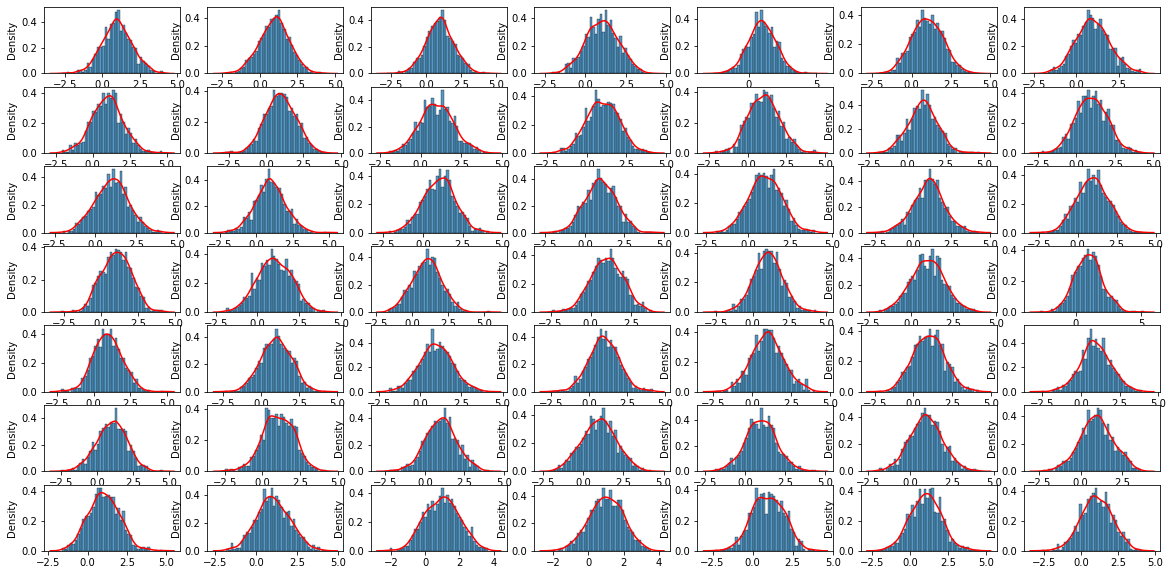

In [29]:
fig, axes = plt.subplots(7, 7, figsize=(20,10))
avgs = []
for i in range(7):
    for j in range(7):
        r1 = n1.rvs(size=1000)
        sns.histplot(r1, bins=40, ax=axes[i][j], stat="density")
        sns.kdeplot(r1, ax=axes[i][j], color='red')
        avgs.append(np.average(r1))

Тем же невооруженным глазом видно, что распределения отличаются друг от друга. Более того, несмотря на то, что они генерировались для одного и того же распределения, у которого среднее и дисперсия равны единице, средние значения отличаются от одной группы точек к другой.

![](https://miro.medium.com/max/571/1*z3OuQ-HCQTyUnzcgimvI4w.png)

Давайте сгенерируем достаточно много распределений, чтобы на них можно было делать какие-то твердые выводы, и посмотрим на распределение средних значений по группам точек. Как видно из рисунка (и это можно доказать формально) средние значения (и медианы) также распределены нормально. То есть разные выборки для одного и того же распределения различаются между собой, разичны и их средние значения, и тот факт, что для выборки среднее принимает какое-то значение ещё не означает, что среднее для всего распределения находится там же.

<AxesSubplot:ylabel='Count'>

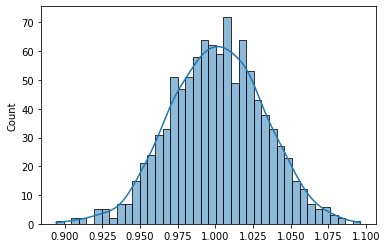

In [30]:
avgs = []
for i in range(1000):
    r1 = n1.rvs(size=1000)
    avgs.append(np.average(r1))
    
sns.histplot(avgs, bins=40, kde=True)


<AxesSubplot:ylabel='Count'>

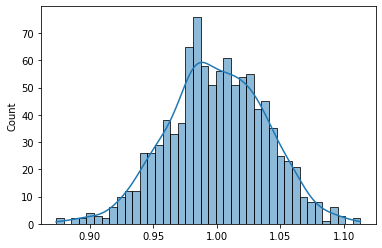

In [32]:
avgs = []
for i in range(1000):
    r1 = n1.rvs(size=1000)
    avgs.append(np.median(r1))
    
sns.histplot(avgs, bins=40, kde=True)


Кстати, об отличиях между средним и медианой. Возьмем гамма-распределение, показанное на рисунке ниже. 

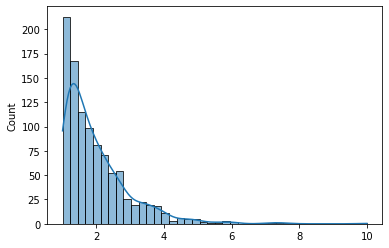

In [39]:
b1 = stats.gamma(1, 1)
br1 = b1.rvs(size=1000)
sns.histplot(br1, bins=40, kde=True);

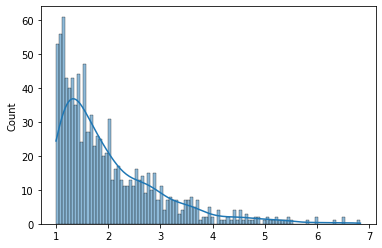

In [34]:
b1 = stats.gamma(1, 1)
br1 = b1.rvs(size=1000)
sns.histplot(br1, bins=100, kde=True);


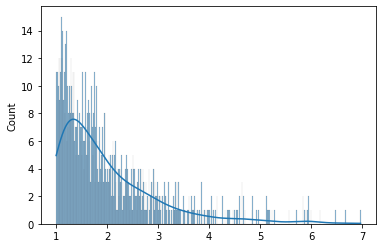

In [35]:
b1 = stats.gamma(1, 1)
br1 = b1.rvs(size=1000)
sns.histplot(br1, bins=500, kde=True);


Легко увидеть, что оно несимметрично. Как следствие, его среднее и медиана сильно отличаются между собой. Подобное различие можно трактовать как показатель несимметричности распределения.

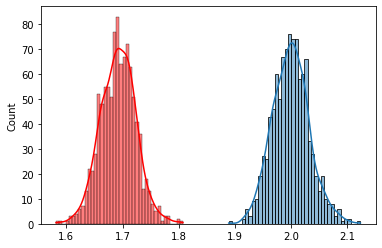

In [41]:
avgs = []
meds = []
for i in range(1000):
    r1 = b1.rvs(size=1000)
    avgs.append(np.average(r1))
    meds.append(np.median(r1))
    
ax = sns.histplot(avgs, bins=40, kde=True)
ax = sns.histplot(meds, bins=40, kde=True, color="r", ax=ax)


Теперь попытаемся оценить степень этой несимметричности при помощи диаграммы размаха. Ниже показаны диаграммы для гамма распределения (очень несимметричного), и распределений средних и демиан (ближе к нормальному распределению).

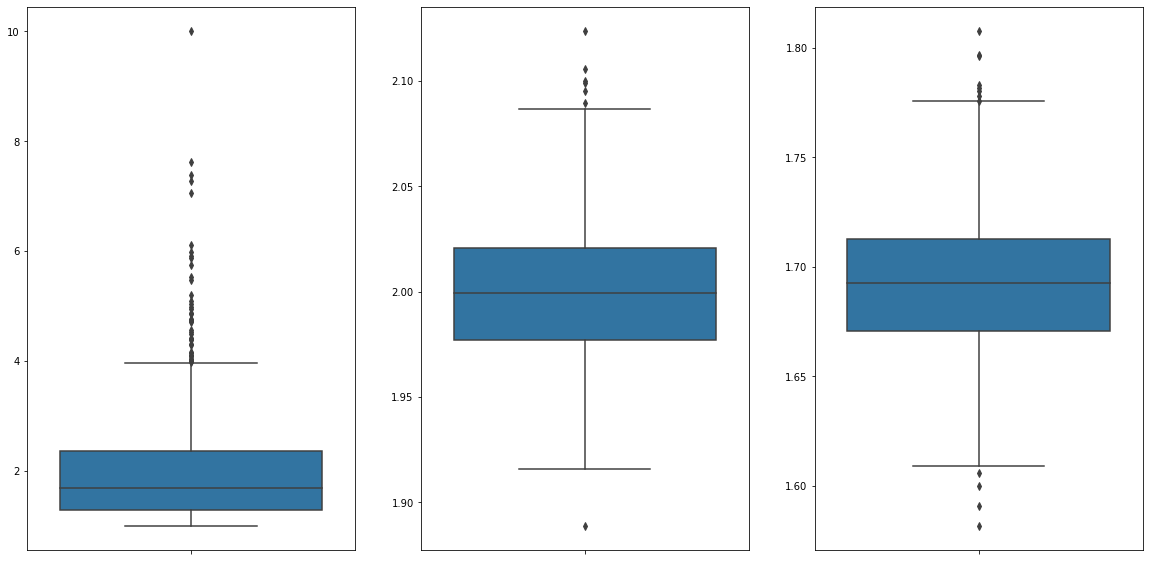

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
sns.boxplot(y=br1, ax=axes[0]);
sns.boxplot(y=avgs, ax=axes[1]);
sns.boxplot(y=meds, ax=axes[2]);

А теперь проведем следующий эксперимент. Возьмем один набор из тысячи точек и возьмем разные его подвыборки размером в сто точек. Посмотрим как разные подвыборки отличаются друг от друга и от итогового распределения.

['1.067', '0.99152', '0.8906', '0.9301', '1.0415', '0.89592', '1.0427', '1.0804', '0.99927']


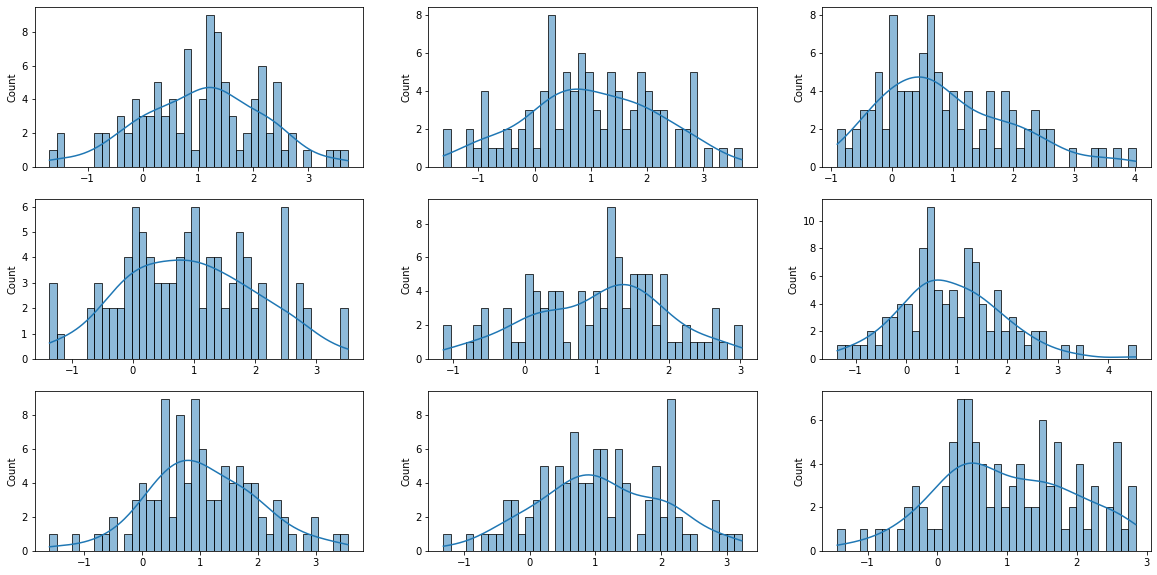

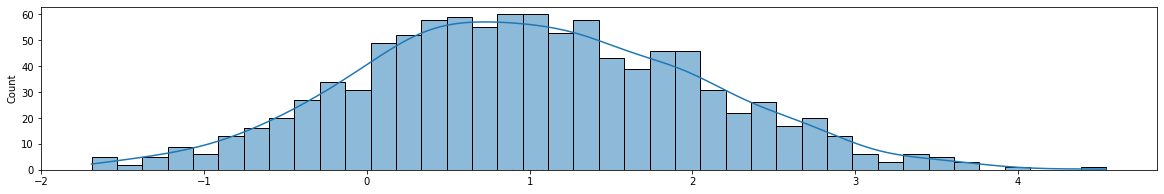

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
r1 = n1.rvs(size=1000)
avgs = []
for i in range(3):
    for j in range(3):
        sns.histplot(x=r1[(i*3+j)*100:(i*3+j+1)*100], bins=40, ax=axes[i][j], kde=True)
        avgs.append(np.average(r1[(i*3+j)*100:(i*3+j+1)*100]))
# fig.show()        

fig, ax = plt.subplots(1, 1, figsize=(20, 3))
sns.histplot(x=r1, bins=40, ax=ax, kde=True)
for a in avgs:
    sns.lineplot(x=[a, a], y=[0, 0.5], color="r", ax=ax)
    
print([f"{a:1.5}" for a in avgs])

А теперь возьмем нарастающим итогом, чтобы число точек увеличивалось и среднее приближалось к настоящему.

['1.067', '0.99152', '0.8906', '0.9301', '1.0415', '0.89592', '1.0427', '1.0804', '0.99927']


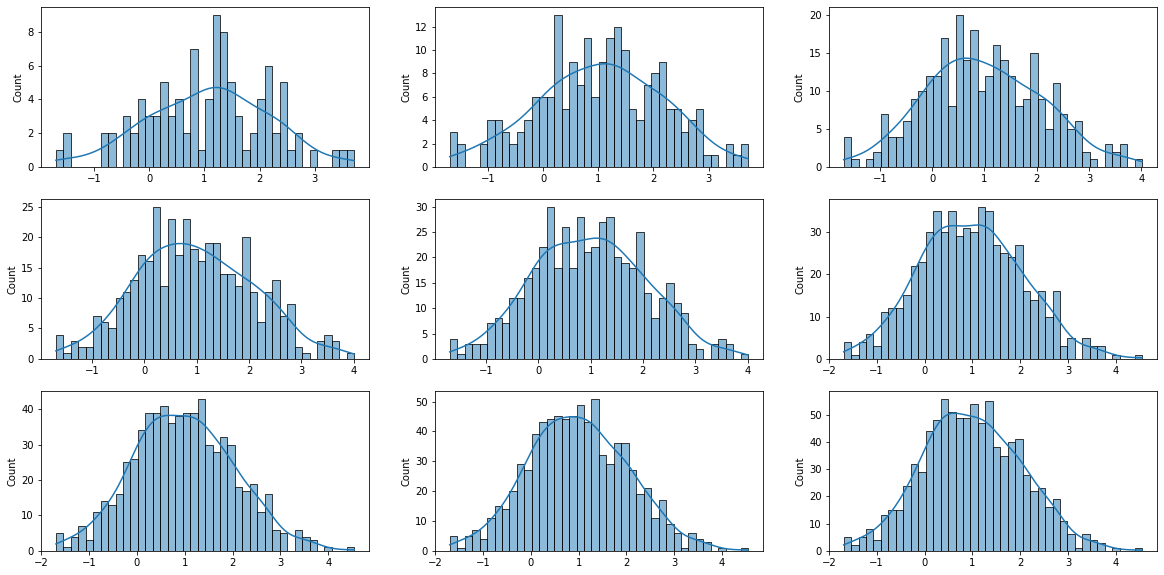

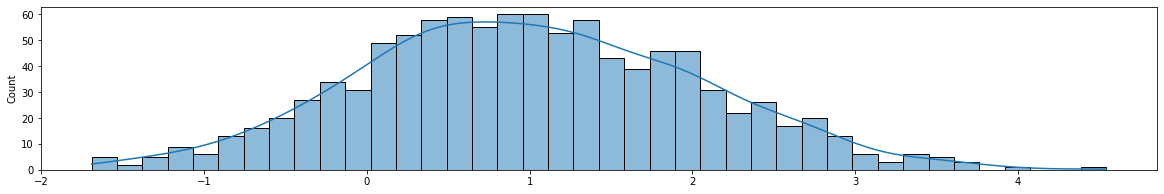

In [85]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
# Берем распределение из предыдущего графика.
# r1 = n1.rvs(size=1000)
avgs_2 = []
for i in range(3):
    for j in range(3):
        sns.histplot(x=r1[:(i*3+j+1)*100], bins=40, ax=axes[i][j], kde=True)
        avgs_2.append(np.average(r1[:(i*3+j+1)*100]))
# fig.show()        

fig, ax = plt.subplots(1, 1, figsize=(20, 3))
sns.histplot(x=r1, bins=40, ax=ax, kde=True)
for a in avgs_2:
    sns.lineplot(x=[a, a], y=[0, 0.5], color="r", ax=ax)
    
print([f"{a:1.5}" for a in avgs])

Чем больше точек, тем ближе к настоящему среднему мы попадаем. Этот факт отражает доверительный интервал.

$ se=\sqrt{\frac{\sum{x_i-\overline{x}}}{n-1}}$; $\mu=\overline{x}\pm Z_{\alpha/2}*\frac{se}{\sqrt{n}}$

Для 95% интервала $Z_{\alpha/2}=1.96$

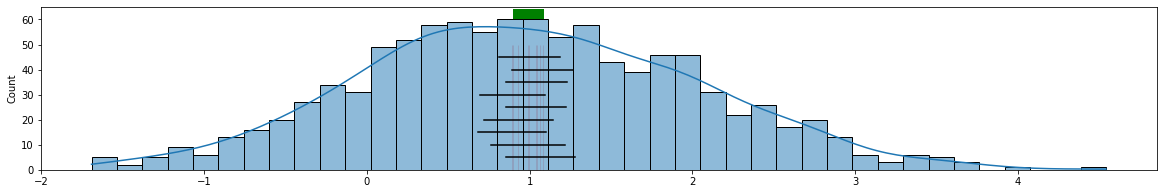

In [86]:
def get_conf_interval(r1):
    a = np.average(r1)
    se1 = a - 1.96 * np.std(r1) / np.sqrt(len(r1))
    se2 = a + 1.96 * np.std(r1) / np.sqrt(len(r1))
    return se1, se2

fig, ax = plt.subplots(1, 1, figsize=(20, 3))

sns.histplot(r1, bins=40, ax=ax, kde=True)
for a in avgs:
    sns.lineplot(x=[a, a], y=[0, 50], color="r", ax=ax)

sns.lineplot(x=get_conf_interval(r1), y=[62, 62], color="g", linewidth=10, ax=ax)

for i in range(len(avgs)):
    sns.lineplot(x=get_conf_interval(r1[i*100: (i+1)*100]), y=[5+i*5, 5+i*5], color="k", ax=ax)


А теперь посмотрим как будет меняться доверительный интервал, если мы будем постепенно добавлять к нему данные.

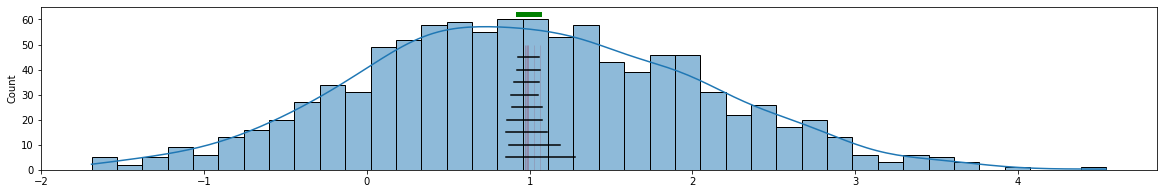

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))

sns.histplot(r1, bins=40, ax=ax, kde=True)
for a in avgs_2:
    sns.lineplot(x=[a, a], y=[0, 50], color="r", ax=ax)
sns.lineplot(x=get_conf_interval(r1), y=[62, 62], color="g", linewidth=5, ax=ax)

for i in range(len(avgs)):
    sns.lineplot(x=get_conf_interval(r1[: (i+1)*100]), y=[5+i*5, 5+i*5], color="k", ax=ax)


Теперь возьмем какое-то третье распределение, также нормальное, но со средним в 1.2, и помотрим как предыдущее будет соотноситься с ним. С некоторой точностью эти два распределения должны давать нам разные результаты. Но так как они оба распределены по нормальному закону, то их множества значений могут пересекаться. В какой момент мы сможем утверждать, что распределения различны? Когда можно сказать, что мы набрали достаточную статистику для такого утверждения?

Для иллюстрации посмотрим на подвыборки из 10 элементов для двух выбранных распределений (дисперсия равна 1, среднее 1 и 1.2, соответственно).

In [72]:
n2 = stats.norm(loc=1.2, scale=1)

In [73]:
r2 = n2.rvs(size=1000)

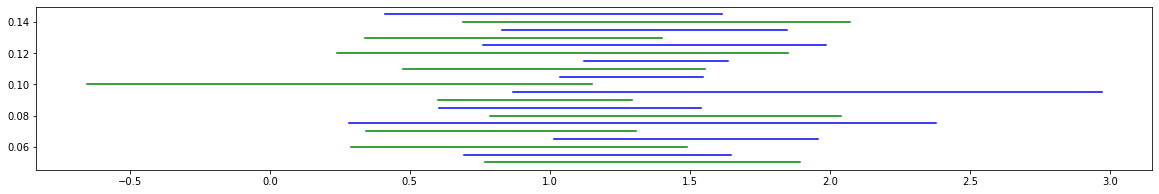

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))

for i in range(10):
    sns.lineplot(x=get_conf_interval(r1[i*10: (i+1)*10]), y=[0.05+i*0.01, 0.05+i*0.01], color="g", ax=ax)
    sns.lineplot(x=get_conf_interval(r2[i*10: (i+1)*10]), y=[0.055+i*0.01, 0.055+i*0.01], color="b", ax=ax)

Как видно из рисунка, доверительные интервалы для каждого подсножества точек существенно пересекаются. Это означает, что мы не можем постулировать, что распределения различны. С вероятностью около 5% среднее значение может находиться на пересечении.

Посмотрим теперь на выборки из 20 объектов.

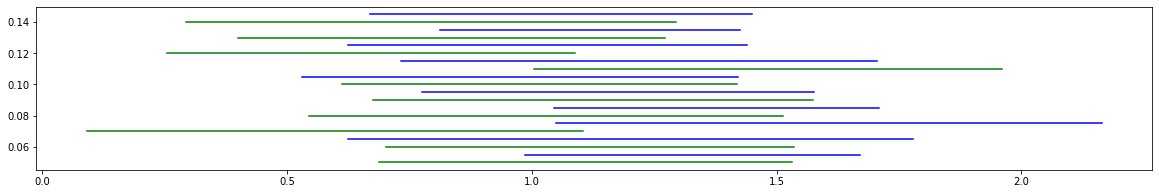

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))

for i in range(10):
    sns.lineplot(x=get_conf_interval(r1[i*20: (i+1)*20]), y=[0.05+i*0.01, 0.05+i*0.01], color="g", ax=ax)
    sns.lineplot(x=get_conf_interval(r2[i*20: (i+1)*20]), y=[0.055+i*0.01, 0.055+i*0.01], color="b", ax=ax)

Всё ещё сложно что-то утверждать. Или разница слишком мала, или это одно и то же распределение. Увеличим число объектов до 100.

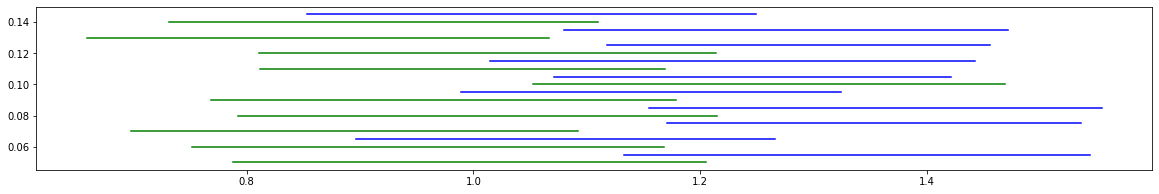

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))

for i in range(10):
    sns.lineplot(x=get_conf_interval(r1[i*100: (i+1)*100]), y=[0.05+i*0.01, 0.05+i*0.01], color="g", ax=ax)
    sns.lineplot(x=get_conf_interval(r2[i*100: (i+1)*100]), y=[0.055+i*0.01, 0.055+i*0.01], color="b", ax=ax)

Здесь видно, что доверительные интервалы могут не пересекаться. Но могут и пересечься. Значит 20 объектов может не хватить для достоверного утверждения различий.

Попробуем брать объекты постепенно увеличивая их количество от 100 до 1000.

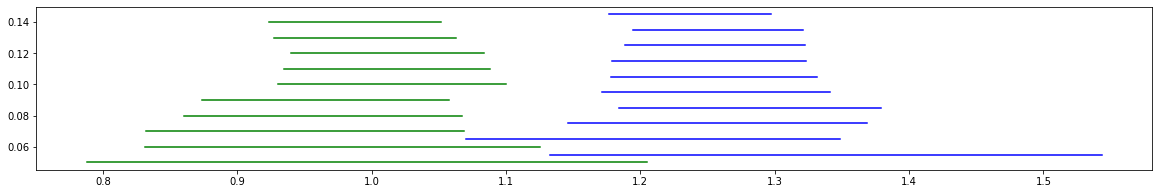

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))

for i in range(10):
    sns.lineplot(x=get_conf_interval(r1[: (i+1)*100]), y=[0.05+i*0.01, 0.05+i*0.01], color="g", ax=ax)
    sns.lineplot(x=get_conf_interval(r2[: (i+1)*100]), y=[0.055+i*0.01, 0.055+i*0.01], color="b", ax=ax)

Видно, что достоверные отличия начинают быть видны от 700 объектов. Хотя, например, на 600 объектах пересечение настолько мало, что вероятность того, что средние для обоих распределений попадут в этот интервал, значительно ниже 5%.

Для того, чтобы оценить, сколько нам необходимо объектов для подтверждения факта, что распределения различны, используем [Power Analysis](https://en.wikipedia.org/wiki/Power_(statistics)) \([или вот](http://www.statskingdom.com/doc_test_power.html)\). По нему надо посчитать ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d7326aa9d5d7c4c8bcbb9c569949cd1e53203a88) Здесь **Ф** - это куммулятивное распределение нормальной функции, 1.64 - константа для 95% уверенности, после минуса - обратное стандартное отклонение (которое используется для расчета доверительного интервала), умноженное на дельту между средними значениями двух распределений. Это значение должно быть >95%, но если не вычитать из 1, то <5%.

In [80]:
def calcStatPower(data1, data2):
    delta = np.abs(np.average(data1) - np.average(data2))
    se = np.std(data1) / np.sqrt(len(data1))
    power = stats.norm.cdf(1.645 - delta / se)
    
    return power, power < 0.05

(0.0582621024711872, False) (0.7883165318491195, 1.2048000784769561) (1.1327767331334029, 1.5434007821252937)
(0.07564004886733322, False) (0.830981168572327, 1.125425161144713) (1.0702696444563988, 1.3488380781499163)
(0.0002862978818777765, True) (0.832298469168769, 1.0686743846914524) (1.1461245185918152, 1.3686145229720408)
(5.547515628347593e-06, True) (0.8605884455515987, 1.0669108931133995) (1.1843344233164592, 1.3789382814427513)
(2.8064872753162802e-06, True) (0.8736319559387884, 1.0579225547424695) (1.1717014109881292, 1.3414466864876846)
(4.739524807688353e-05, True) (0.9302157382414014, 1.0996815100967283) (1.1783289613713268, 1.3313080521830212)
(4.166917542580481e-06, True) (0.9344803556721778, 1.0884150188217918) (1.1787025358526806, 1.3233870015564613)
(2.813092930198422e-07, True) (0.9397061051854976, 1.0835090976346062) (1.1887684996476027, 1.322248905418679)
(1.4127706466356973e-09, True) (0.9272243286538984, 1.0629455186846468) (1.1945526895756364, 1.320943024128797

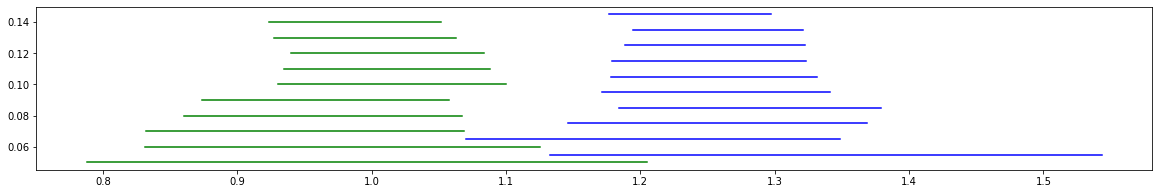

In [81]:
for i in range(10):
    print(calcStatPower(r1[: (i+1)*100], r2[: (i+1)*100]), 
          get_conf_interval(r1[: (i+1)*100]), 
          get_conf_interval(r2[: (i+1)*100]))
    
fig, ax = plt.subplots(1, 1, figsize=(20, 3))

for i in range(10):
    sns.lineplot(x=get_conf_interval(r1[: (i+1)*100]), y=[0.05+i*0.01, 0.05+i*0.01], color="g", ax=ax)
    sns.lineplot(x=get_conf_interval(r2[: (i+1)*100]), y=[0.055+i*0.01, 0.055+i*0.01], color="b", ax=ax)

Выше приведены значения статистической силы и доверительные интервалы. Как видно, статистическая сила высока, когда пересечение становится очень маленьким, либо интервалы полностью не пересекаются.

![](https://imgs.xkcd.com/comics/acceptable_risk_2x.png)

In [ ]:
А теперь надо показать как связаны доверительные интервалы и критерий Стьюдента или Колмогорова. Что при расхождении интервалов и Стьюдент расходится.